maximum z is: 21.0


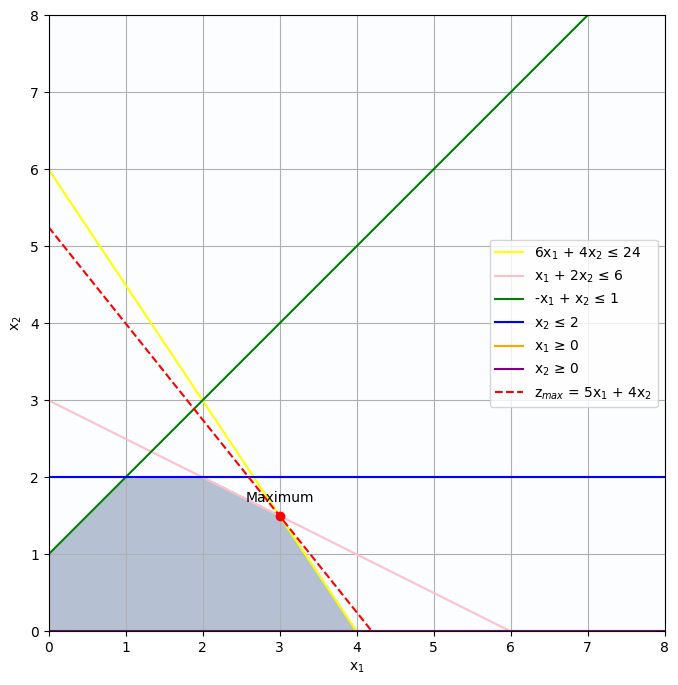

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 10, 600)
x2 = np.linspace(0, 10, 600)
X1, X2 = np.meshgrid(x1, x2)

eq1 = X1 + 2 * X2 <= 6
eq2 = -X1 + X2 <= 1
eq3 = X2 <= 2
eq4 = (X1 >= 0) & (X2 >= 0)
eq5 = 6*X1 + 4*X2 <= 24


feasible_region = eq1 & eq2 & eq3 & eq4 & eq5
plt.figure(figsize=(8, 8))
plt.imshow(feasible_region, extent=(0, 10, 0, 10), origin='lower', cmap='Blues', alpha=0.3)

plt.xlabel('x$_{1}$')
plt.ylabel('x$_{2}$')
plt.grid(True)

plt.plot(x1, (24-6*x1)/4, label='6x$_{1}$ + 4x$_{2}$ ≤ 24', color='yellow')
plt.plot(x1, (6 - x1) / 2, label='x$_{1}$ + 2x$_{2}$ ≤ 6', color='pink')
plt.plot(x1, x1 + 1, label='-x$_{1}$ + x$_{2}$ ≤ 1', color='green')
plt.plot(x1, np.full_like(x1, 2), label='x$_{2}$ ≤ 2', color='blue')
plt.plot(x1, np.full_like(x1, 0), label='x$_{1}$ ≥ 0', color='orange')
plt.plot(x1, np.full_like(x1, 0), label='x$_{2}$ ≥ 0', color='purple')
plt.xlim(0,8)
plt.ylim(0,8)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

from scipy.optimize import linprog

c = [-5, -4]

A = [
    [6, 4],    
    [1, 2],    
    [-1, 1],
    [0, 1],
]

b = [24, 6, 1, 2]

x_bounds = [(0, None), (0, None)]
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds)
optimal_x1, optimal_x2 = result.x
max_z = -result.fun
print("maximum z is: "+str(max_z))

plt.plot(optimal_x1, optimal_x2, 'ro')
plt.plot(x1, (max_z - 5*x1)/4, label='z$_{max}$ = 5x$_{1}$ + 4x$_{2}$', color='red', linestyle='--')
plt.annotate("Maximum",
                 (optimal_x1, optimal_x2),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.legend()
plt.show()